<a href="https://colab.research.google.com/github/LuisaPolicarpo/Hackathon--aws/blob/main/EDA/Lu%C3%ADsa_Hackaton_RealEstate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Link1 = https://raw.githubusercontent.com/Gierko/Hackathon-11th-to-13th-January/main/idf_transactions_16_17.csv
Link2 = https://raw.githubusercontent.com/Gierko/Hackathon-11th-to-13th-January/main/idf_transactions_18_19.csv
Link3 = https://raw.githubusercontent.com/Gierko/Hackathon-11th-to-13th-January/main/idf_transactions_2017.csv
Link4 = https://raw.githubusercontent.com/Gierko/Hackathon-11th-to-13th-January/main/info_pop_dem_communes_idf.csv
Link5 = https://raw.githubusercontent.com/Gierko/Hackathon-11th-to-13th-January/main/logements_info_75.csv
Link6 = https://raw.githubusercontent.com/Gierko/Hackathon-11th-to-13th-January/main/transactions_idf_14_15.csv

In [2]:
import pandas as pd

In [3]:
df_16_17 = pd.read_csv('https://raw.githubusercontent.com/Gierko/Hackathon-11th-to-13th-January/main/idf_transactions_16_17.csv') #L

In [5]:
df_2017 = pd.read_csv('https://raw.githubusercontent.com/Gierko/Hackathon-11th-to-13th-January/main/idf_transactions_2017.csv')#L

In [4]:
df_18_19 = pd.read_csv('https://raw.githubusercontent.com/Gierko/Hackathon-11th-to-13th-January/main/idf_transactions_18_19.csv')

In [9]:
df_14_15 = pd.read_csv('https://raw.githubusercontent.com/Gierko/Hackathon-11th-to-13th-January/main/transactions_idf_14_15.csv')

In [19]:
df_pop_dem = pd.read_csv('https://raw.githubusercontent.com/Gierko/Hackathon-11th-to-13th-January/main/info_pop_dem_communes_idf.csv',sep=';')

In [8]:
df_75 = pd.read_csv('https://raw.githubusercontent.com/Gierko/Hackathon-11th-to-13th-January/main/logements_info_75.csv')

In [134]:
df_final_2 = pd.read_csv('/content/df_final',compression= 'zip')

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:
condition1 = df_final_2['nombre_pieces_principales'] > 0 
condition11 =  df_final_2['nombre_pieces_principales'] < 5 

df_final = df_final_2[condition1 & condition11][['id_mutation','valeur_fonciere','surface_reelle_bati','nombre_pieces_principales','type_local','nature_mutation','nom_commune','valeur_fonciere','longitude', 'latitude','date_mutation']]

In [165]:
df_final['nombre_pieces_principales'].value_counts()

3.0    163699
2.0    142057
4.0    129307
1.0     88127
Name: nombre_pieces_principales, dtype: int64

In [166]:
df_final[['year','month','day']] = df_final.date_mutation.str.split("-", expand=True)

In [167]:
df_final['type_local'].value_counts()

Appartement    414874
Maison         108316
Name: type_local, dtype: int64

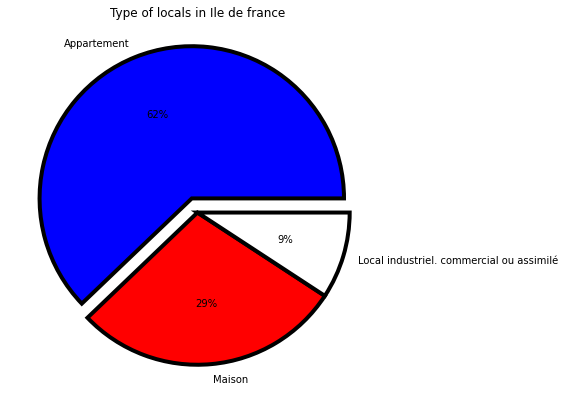

In [153]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn
 
local = ['Appartement', 'Maison', 'Local industriel. commercial ou assimilé']
data = [439163, 202338, 65161]
colors = ['blue', 'red', 'white']
explode = [0.1, 0, 0]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = local, explode=explode, autopct='%.0f%%', wedgeprops = { 'linewidth' : 4, 'edgecolor' : 'black'}, colors=colors)
plt.title("Type of locals in Ile de france")
plt.show()

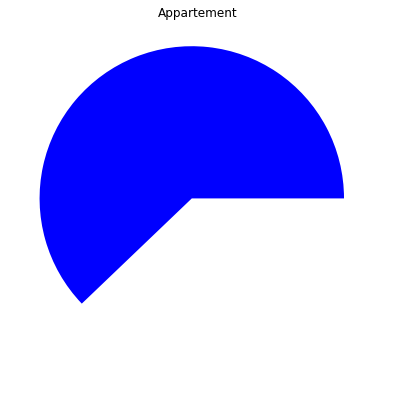

In [154]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn
 
local = ['Appartement', 'Maison', 'Local industriel. commercial ou assimilé']
data = [439163, 202338, 65161]
colors = ['blue', 'white', 'white']
explode = [0.1, 0, 0]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, explode=explode, colors=colors)
plt.title("Appartement")
plt.show()

In [168]:
condition = df_final['type_local'] == 'Appartement' 

df_final_ap = df_final[condition][['valeur_fonciere','nombre_pieces_principales','nature_mutation','year','type_local']]

In [169]:
df_final_ap

,valeur_fonciere,valeur_fonciere,nombre_pieces_principales,nature_mutation,year,type_local
4,155000.0,155000.0,2.0,Vente,2019,Appartement
5,165500.0,165500.0,3.0,Vente,2019,Appartement
11,690000.0,690000.0,2.0,Vente,2019,Appartement
13,690000.0,690000.0,3.0,Vente,2019,Appartement
14,205000.0,205000.0,3.0,Vente en l'état futur d'achèvement,2019,Appartement
...,...,...,...,...,...,...
706652,1102000.0,1102000.0,4.0,Vente,2022,Appartement
706654,130000.0,130000.0,1.0,Vente,2022,Appartement
706655,330375.0,330375.0,2.0,Vente,2022,Appartement
706660,423000.0,423000.0,2.0,Vente,2022,Appartement


In [170]:
df_final_ap['nombre_pieces_principales'].value_counts()

2.0    131201
3.0    129509
1.0     85091
4.0     69073
Name: nombre_pieces_principales, dtype: int64

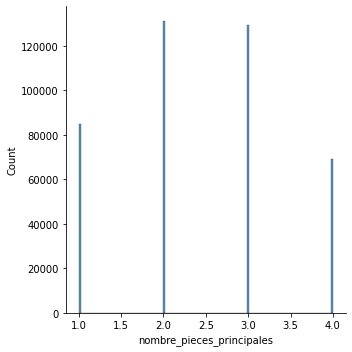

In [179]:
sns.displot(data=df_final_ap, x="nombre_pieces_principales")

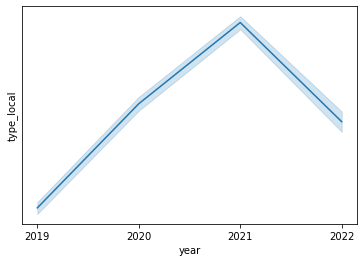

In [149]:
sns.lineplot(x = 'year', y = 'type_local', data = df_final)

In [47]:
df_pop_dem

,Code INSEE,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,ID Geofla,Code Commune,Code Canton,Code Arrondissement,Code Département,Code Région
0,91645,91370,VERRIERES-LE-BUISSON,ESSONNE,ILE-DE-FRANCE,Commune simple,121.0,999.0,15.5,"48.75044312,2.25171297214","{""type"": ""Polygon"", ""coordinates"": [[[2.238024...",16275,645,3,3,91,11
1,77133,77126,COURCELLES-EN-BASSEE,SEINE-ET-MARNE,ILE-DE-FRANCE,Commune simple,88.0,1082.0,0.2,"48.4125606521,3.05294050556","{""type"": ""Polygon"", ""coordinates"": [[[3.076046...",31428,133,20,3,77,11
2,91378,91730,MAUCHAMPS,ESSONNE,ILE-DE-FRANCE,Commune simple,150.0,313.0,0.3,"48.5272680908,2.19718165044","{""type"": ""Polygon"", ""coordinates"": [[[2.203466...",30975,378,9,1,91,11
3,77243,77400,LAGNY-SUR-MARNE,SEINE-ET-MARNE,ILE-DE-FRANCE,Chef-lieu canton,71.0,579.0,20.2,"48.8730701858,2.70978081313","{""type"": ""Polygon"", ""coordinates"": [[[2.727542...",17000,243,14,5,77,11
4,94003,94110,ARCUEIL,VAL-DE-MARNE,ILE-DE-FRANCE,Chef-lieu canton,70.0,232.0,19.5,"48.8058803597,2.33351024984","{""type"": ""Polygon"", ""coordinates"": [[[2.343851...",32123,3,34,3,94,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,77068,77520,CESSOY-EN-MONTOIS,SEINE-ET-MARNE,ILE-DE-FRANCE,Commune simple,137.0,529.0,0.2,"48.5073073046,3.13884419418","{""type"": ""Polygon"", ""coordinates"": [[[3.161508...",21587,68,10,3,77,11
1296,93078,93420,VILLEPINTE,SEINE-SAINT-DENIS,ILE-DE-FRANCE,Chef-lieu canton,65.0,1042.0,35.7,"48.9590202538,2.53630634206","{""type"": ""Polygon"", ""coordinates"": [[[2.557045...",24704,78,40,2,93,11
1297,77061,77130,CANNES-ECLUSE,SEINE-ET-MARNE,ILE-DE-FRANCE,Commune simple,60.0,862.0,2.6,"48.3640376731,2.99078667983","{""type"": ""Polygon"", ""coordinates"": [[[3.004939...",20172,61,20,3,77,11
1298,78677,78930,VILLETTE,YVELINES,ILE-DE-FRANCE,Commune simple,96.0,462.0,0.5,"48.9262788706,1.69374172457","{""type"": ""Polygon"", ""coordinates"": [[[1.702290...",24364,677,7,1,78,11


In [53]:
df_pop_dem['Code Département'].value_counts()

77    514
78    262
91    196
95    185
94     47
93     40
92     36
75     20
Name: Code Département, dtype: int64

In [56]:
df_pop_dem['Département'].value_counts()

SEINE-ET-MARNE       514
YVELINES             262
ESSONNE              196
VAL-D'OISE           185
VAL-DE-MARNE          47
SEINE-SAINT-DENIS     40
HAUTS-DE-SEINE        36
PARIS                 20
Name: Département, dtype: int64

In [65]:
import plotly.express as px
fig = px.scatter_geo(df_pop_dem, locations= 'Région', color="Département",
                     hover_name="Département", size="Population",
                     projection="Paris")
fig.show()

ValueError: ignored

In [66]:
import plotly.express as px
import geopandas as gpd


fig = px.scatter_geo(df_pop_dem,
                    lat=geo_df.geometry.y,
                    lon=geo_df.geometry.x,
                    hover_name="Département")
fig.show()

ModuleNotFoundError: ignored